Training agent...
Episode 500/2000, epsilon: 0.082
Episode 1000/2000, epsilon: 0.010
Episode 1500/2000, epsilon: 0.010
Episode 2000/2000, epsilon: 0.010
Training finished.

Testing learned policy...


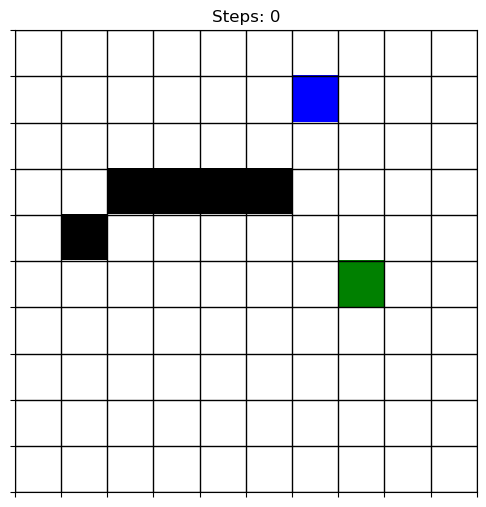

<Figure size 640x480 with 0 Axes>

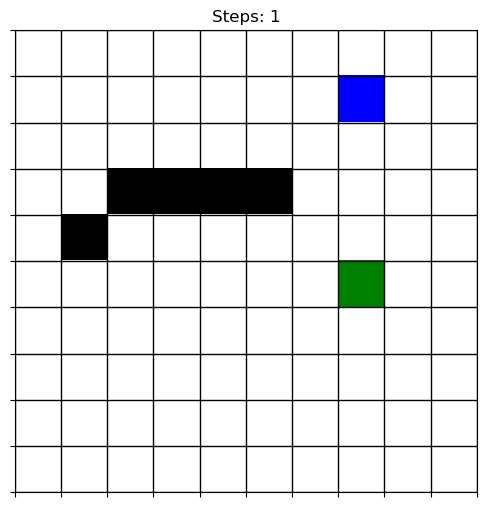

<Figure size 640x480 with 0 Axes>

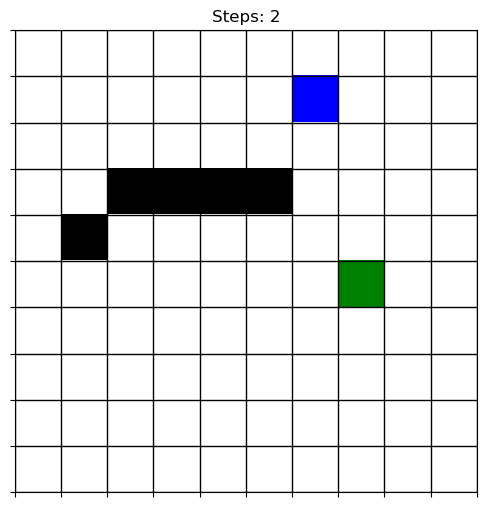

<Figure size 640x480 with 0 Axes>

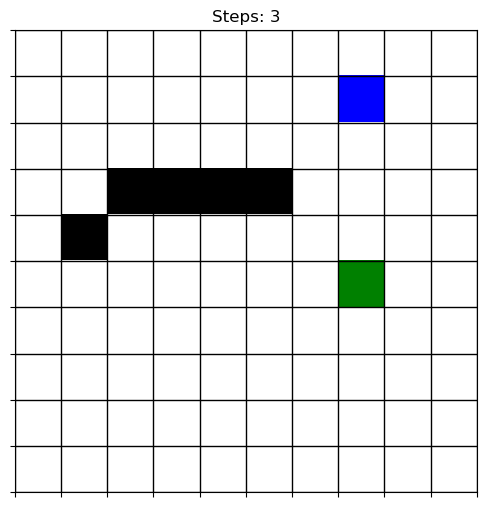

<Figure size 640x480 with 0 Axes>

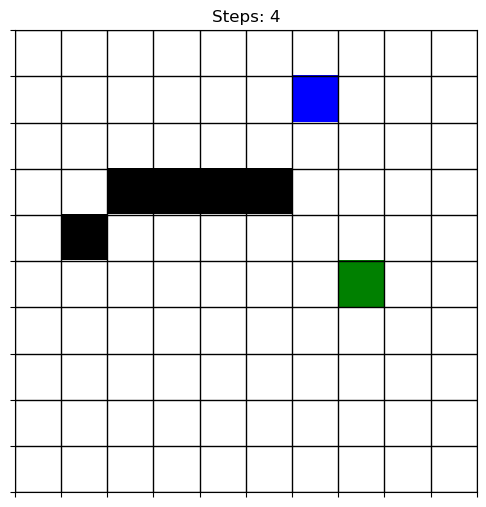

<Figure size 640x480 with 0 Axes>

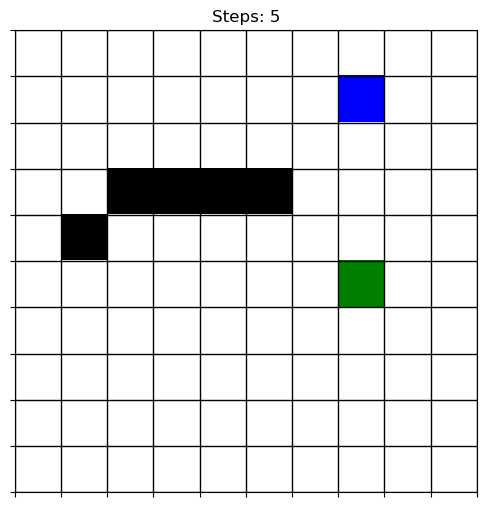

<Figure size 640x480 with 0 Axes>

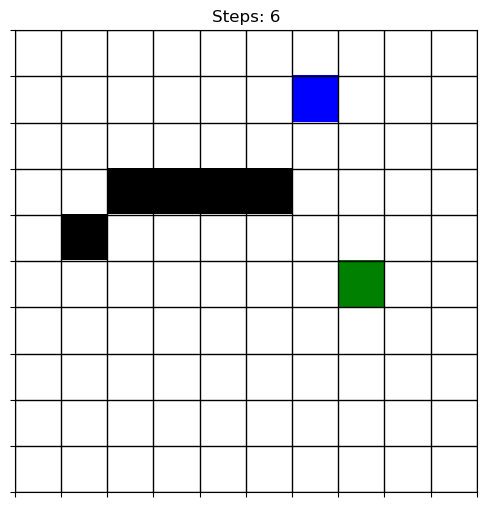

<Figure size 640x480 with 0 Axes>

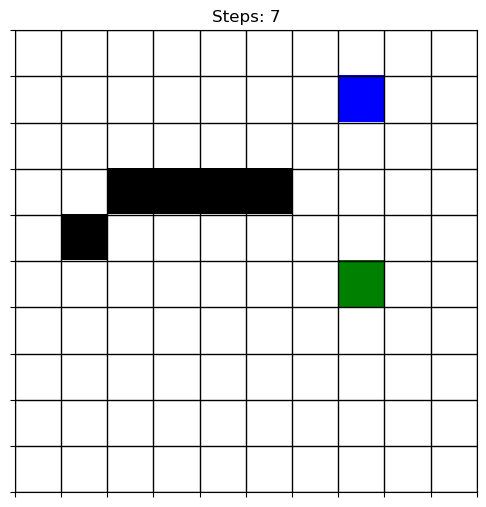

<Figure size 640x480 with 0 Axes>

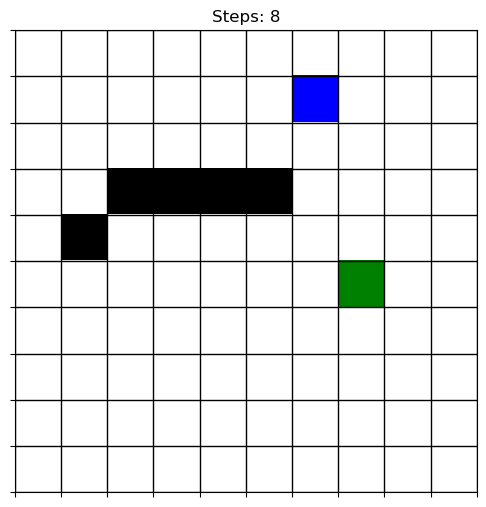

<Figure size 640x480 with 0 Axes>

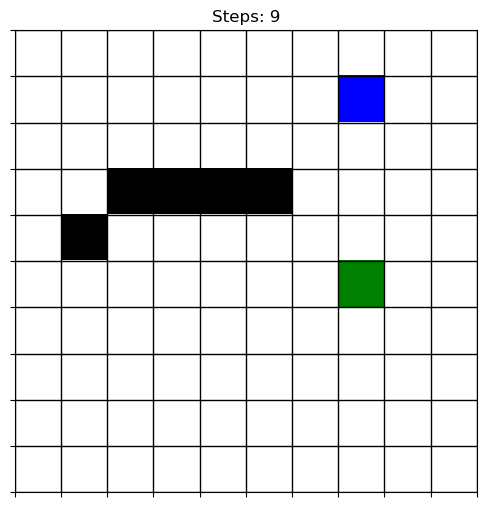

<Figure size 640x480 with 0 Axes>

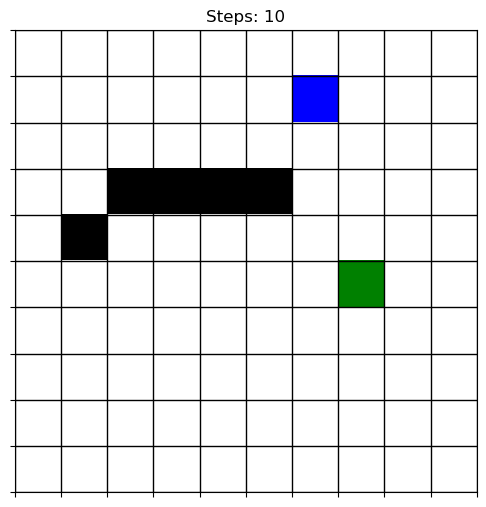

<Figure size 640x480 with 0 Axes>

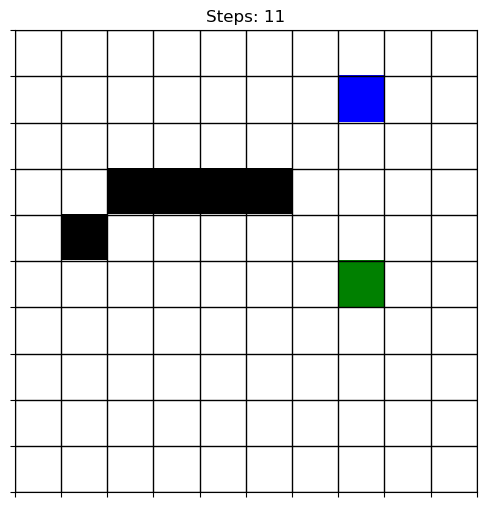

<Figure size 640x480 with 0 Axes>

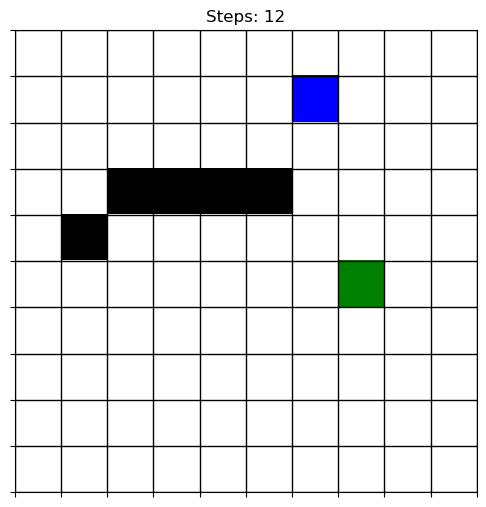

<Figure size 640x480 with 0 Axes>

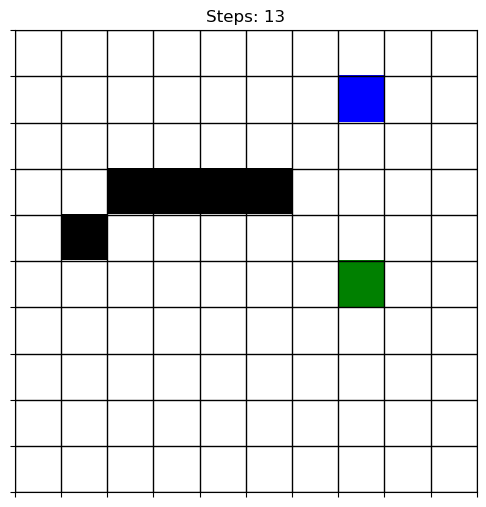

<Figure size 640x480 with 0 Axes>

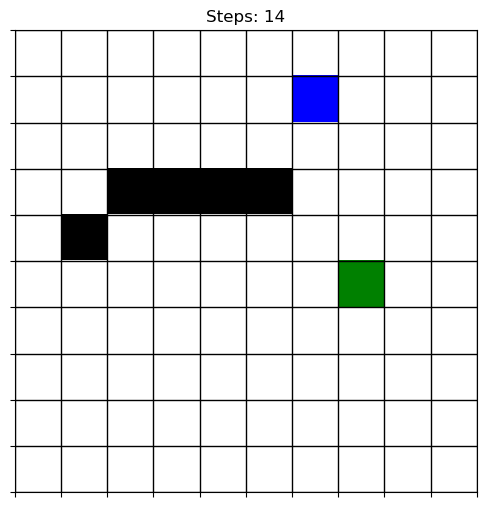

<Figure size 640x480 with 0 Axes>

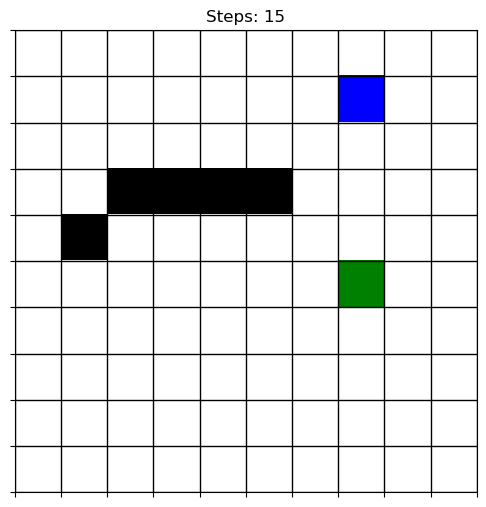

<Figure size 640x480 with 0 Axes>

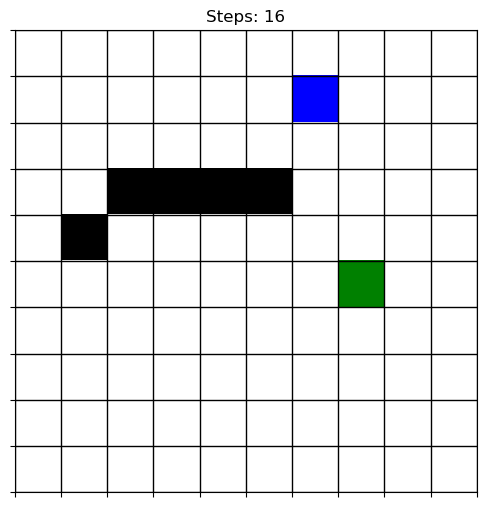

<Figure size 640x480 with 0 Axes>

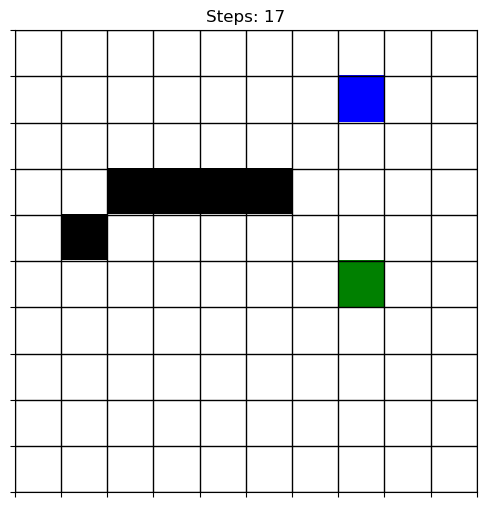

<Figure size 640x480 with 0 Axes>

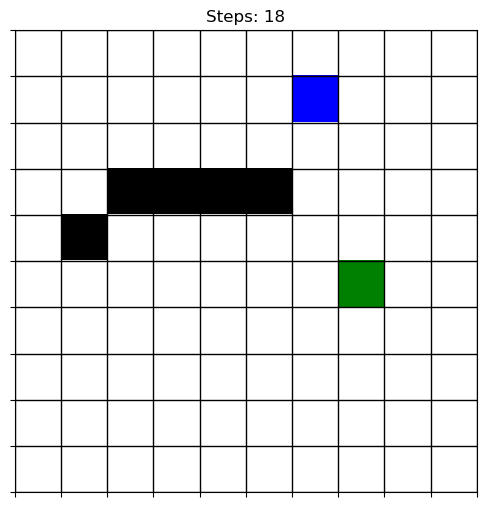

<Figure size 640x480 with 0 Axes>

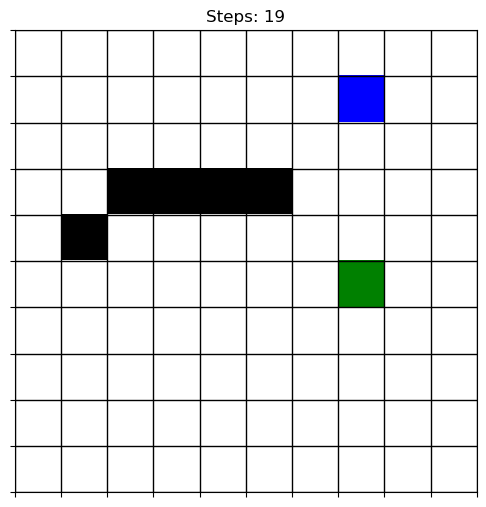

<Figure size 640x480 with 0 Axes>

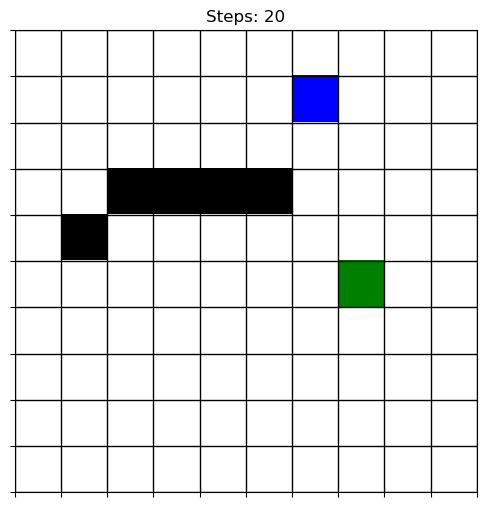

<Figure size 640x480 with 0 Axes>

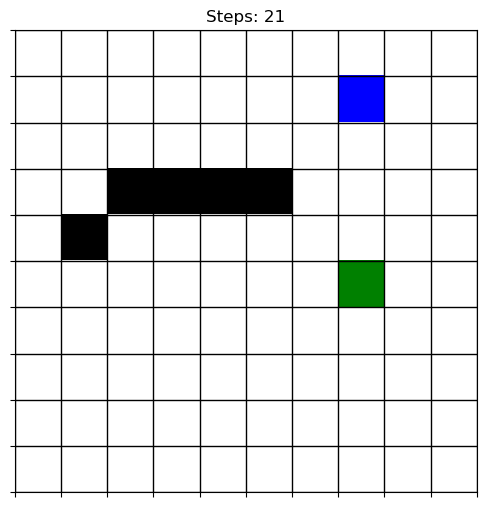

<Figure size 640x480 with 0 Axes>

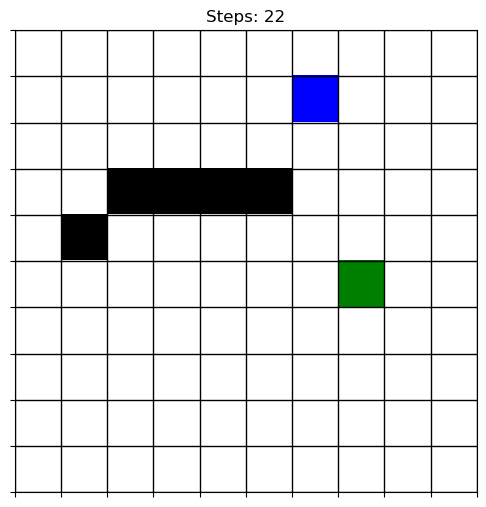

<Figure size 640x480 with 0 Axes>

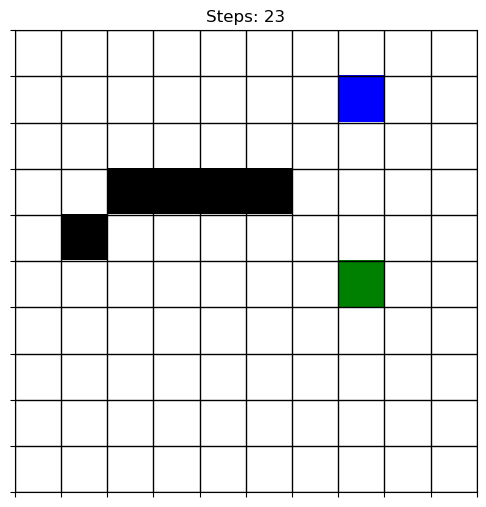

<Figure size 640x480 with 0 Axes>

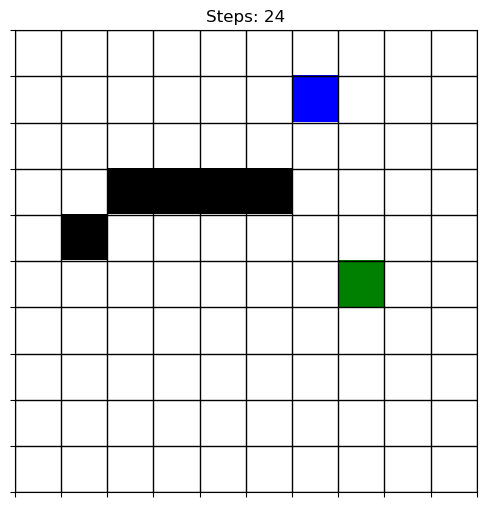

<Figure size 640x480 with 0 Axes>

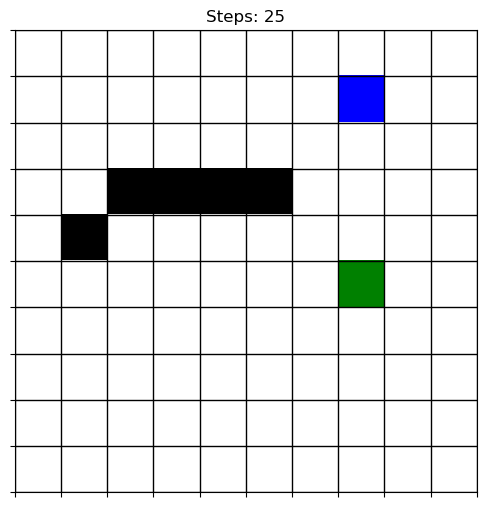

<Figure size 640x480 with 0 Axes>

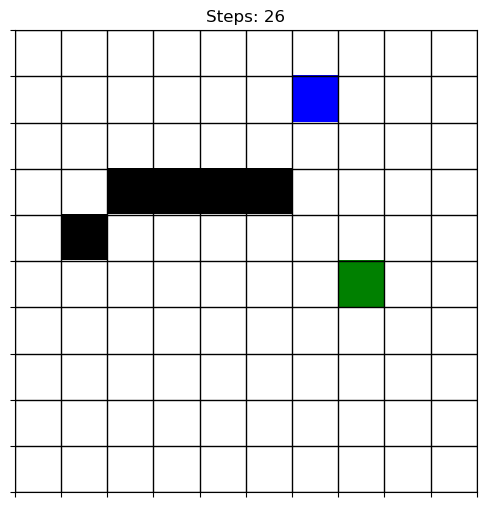

<Figure size 640x480 with 0 Axes>

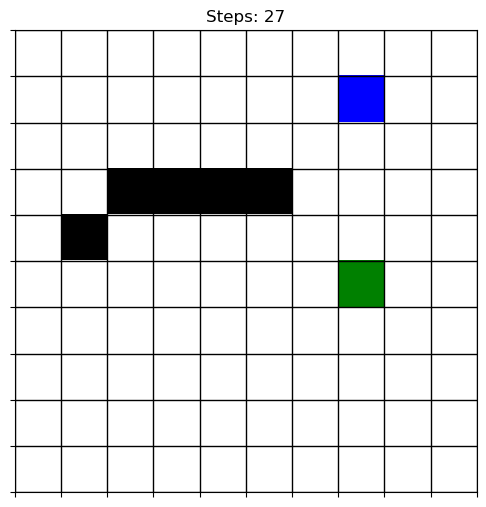

<Figure size 640x480 with 0 Axes>

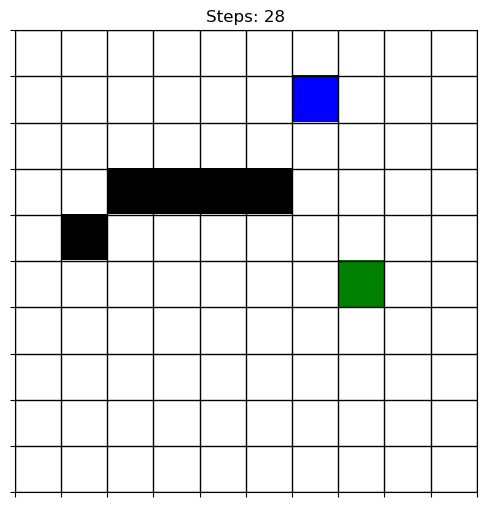

<Figure size 640x480 with 0 Axes>

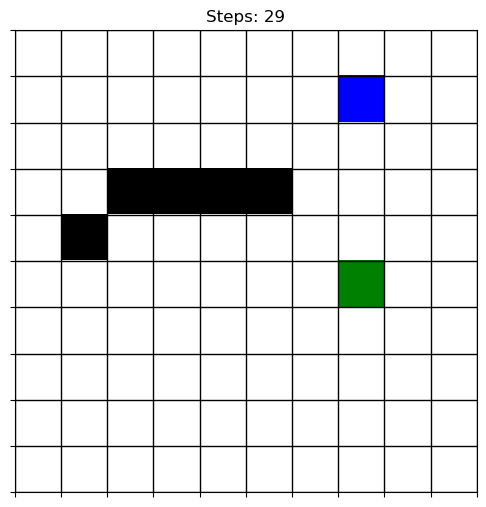

<Figure size 640x480 with 0 Axes>

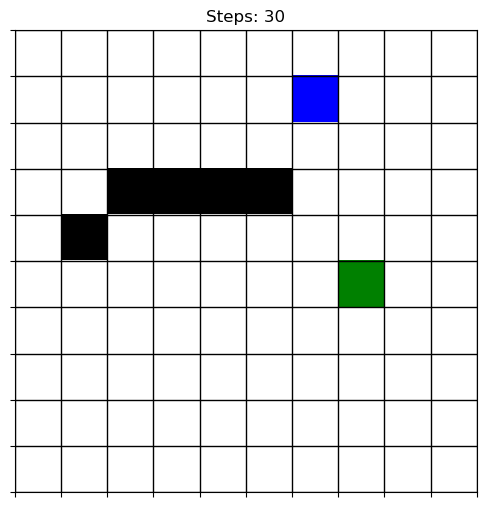

<Figure size 640x480 with 0 Axes>

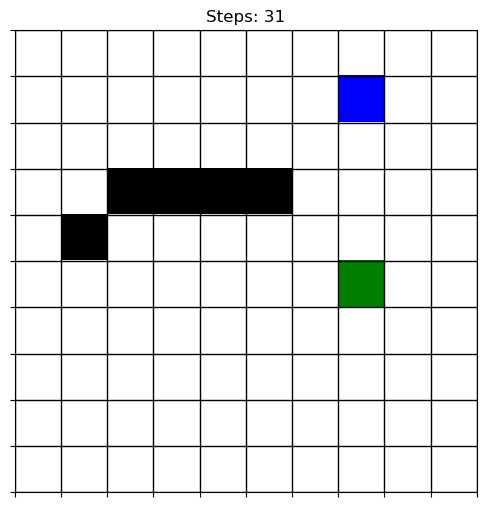

<Figure size 640x480 with 0 Axes>

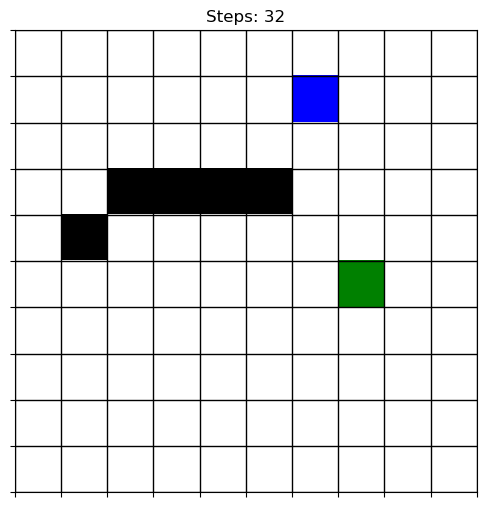

<Figure size 640x480 with 0 Axes>

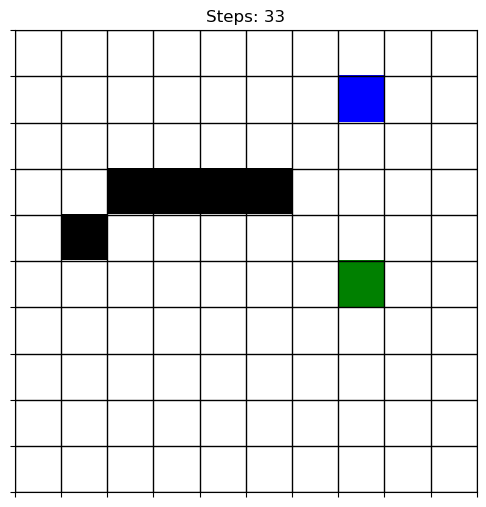

<Figure size 640x480 with 0 Axes>

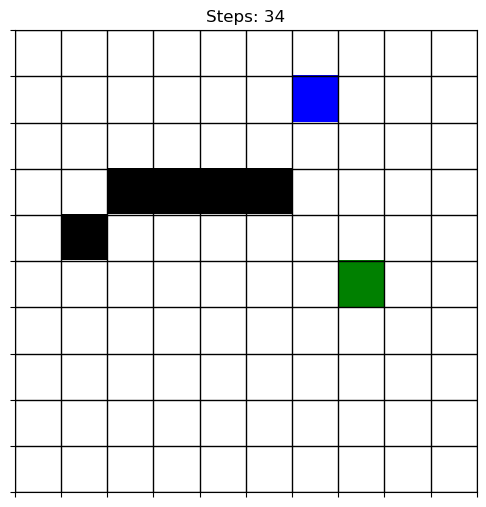

<Figure size 640x480 with 0 Axes>

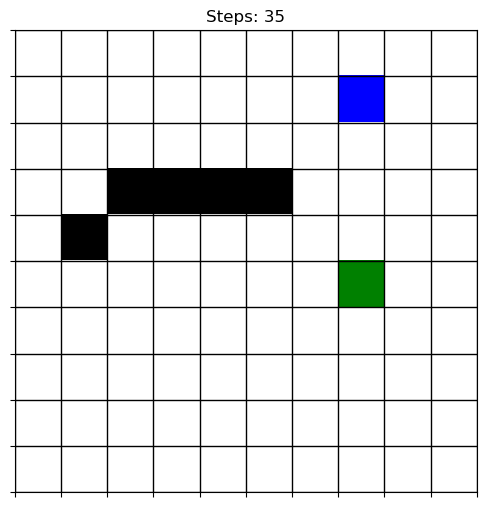

<Figure size 640x480 with 0 Axes>

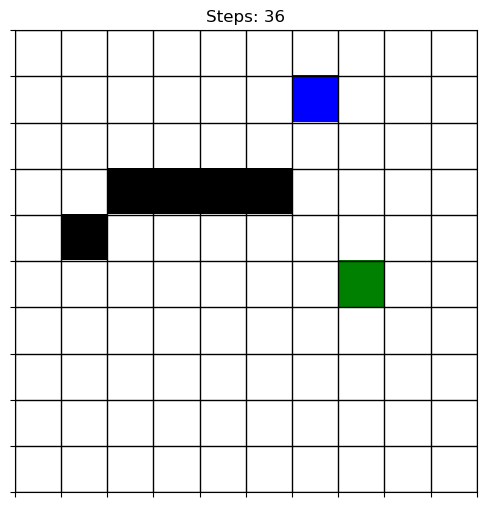

<Figure size 640x480 with 0 Axes>

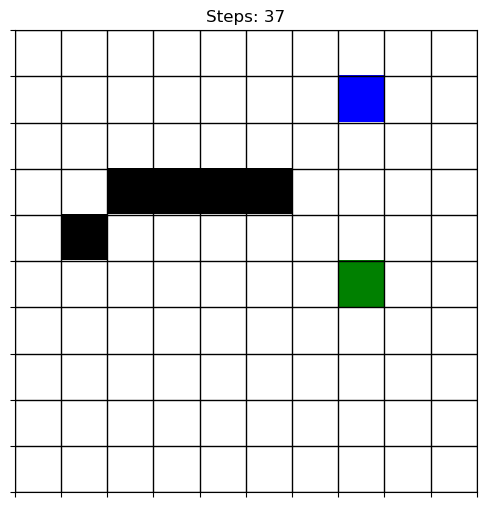

<Figure size 640x480 with 0 Axes>

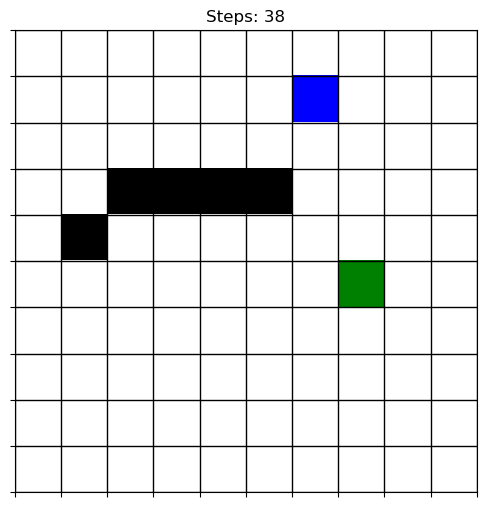

<Figure size 640x480 with 0 Axes>

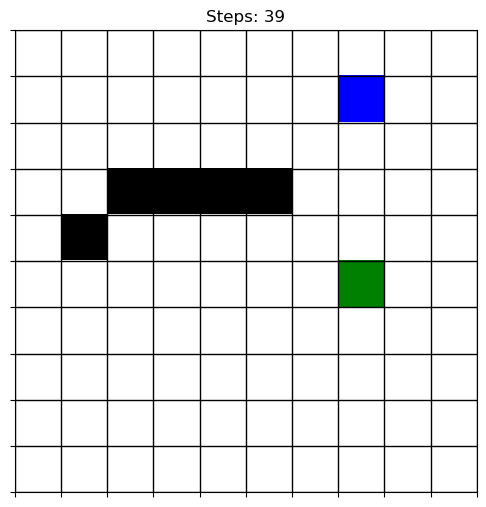

<Figure size 640x480 with 0 Axes>

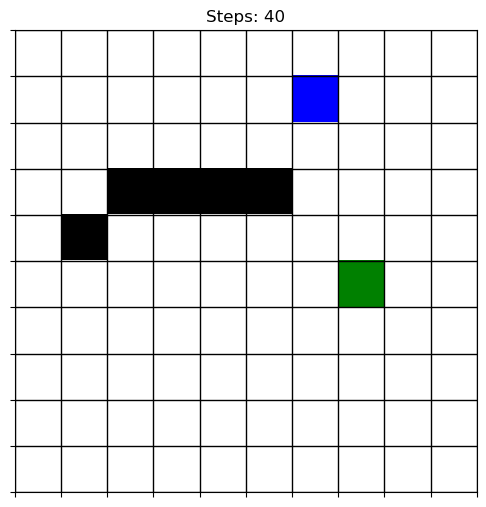

<Figure size 640x480 with 0 Axes>

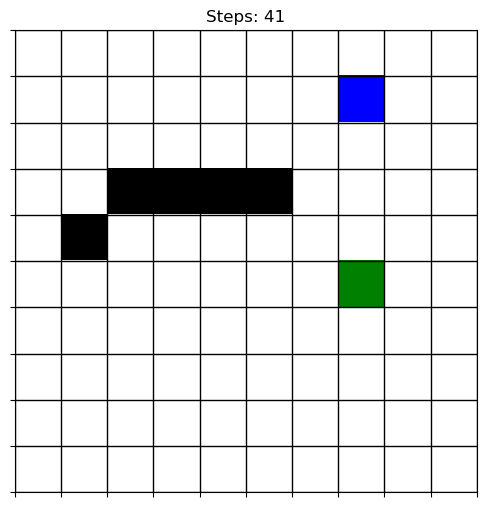

<Figure size 640x480 with 0 Axes>

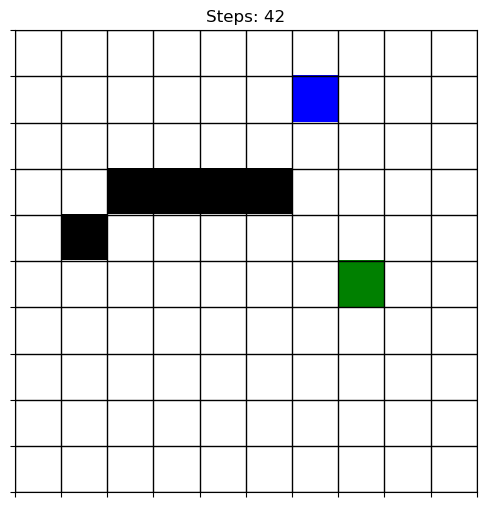

<Figure size 640x480 with 0 Axes>

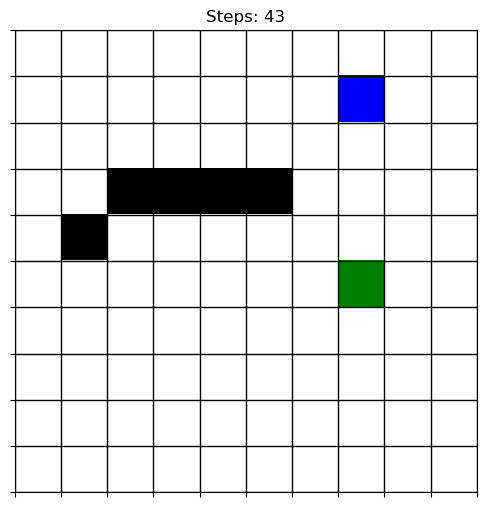

<Figure size 640x480 with 0 Axes>

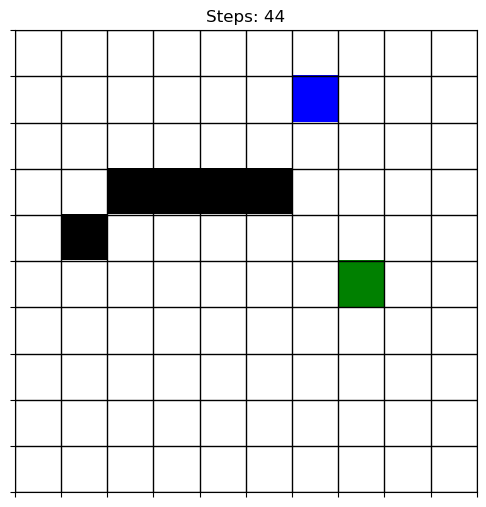

<Figure size 640x480 with 0 Axes>

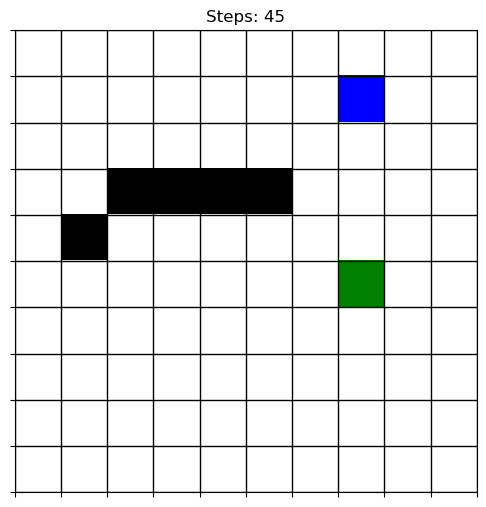

<Figure size 640x480 with 0 Axes>

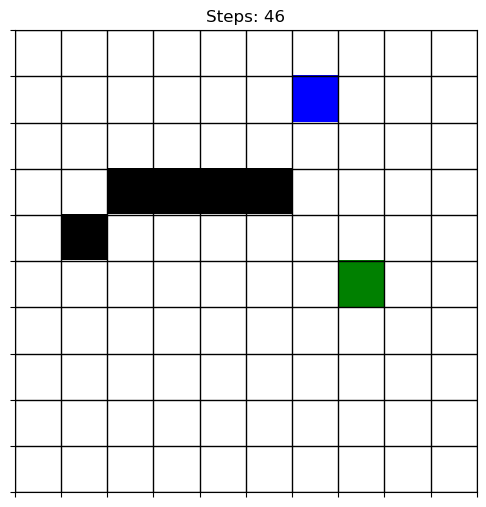

<Figure size 640x480 with 0 Axes>

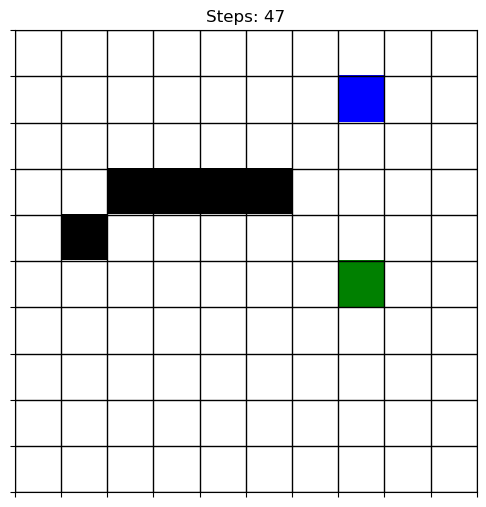

<Figure size 640x480 with 0 Axes>

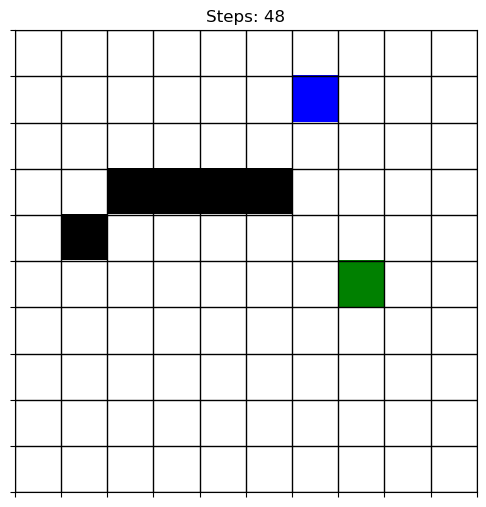

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

class Agent:
    def __init__(self):
        self.start = None
        self.pos = None

    def set_position(self, start):
        self.start = tuple(start)
        self.reset()

    def reset(self):
        self.pos = tuple(self.start)

    def move(self, action, height, width):
        r, c = self.pos
        if action == 0:      # up
            r -= 1
        elif action == 1:    # right
            c += 1
        elif action == 2:    # down
            r += 1
        elif action == 3:    # left
            c -= 1

        if 0 <= r < height and 0 <= c < width:
            self.pos = (r, c)

        return self.pos

# -------------------------- ENVIRONMENT CLASS --------------------------

class GridWorld:
    def __init__(self, height=5, width=5, start=None, goal=None,
                 reward_goal=1, reward_step=-1, obstacles=None, obstacle_penalty=-100):
        self.height, self.width = height, width
        self.obstacles = set(tuple(o) for o in obstacles) if obstacles else set()

        # Initialize start position
        self.start = tuple(start) if start else self._random_free_cell()
        
        # Initialize goal(s)
        if goal is None:
            self.goals = [self._random_free_cell(exclude=[self.start])]
        elif isinstance(goal, list):
            self.goals = [tuple(g) for g in goal]
        else:
            self.goals = [tuple(goal)]

        # Validation
        assert self.start not in self.obstacles, "Start position can't be an obstacle"
        for g in self.goals:
            assert g not in self.obstacles, f"Goal {g} can't be an obstacle"

        self.agent = Agent()
        self.agent.set_position(self.start)

        self.reward_goal = reward_goal
        self.reward_step = reward_step
        self.obstacle_penalty = obstacle_penalty
        self._steps = 0

        # For visualization
        self.cmap = colors.ListedColormap(["white", "blue", "green", "black"])
        self.norm = colors.BoundaryNorm([0, 2, 3, 4, 5], self.cmap.N)

    def _random_free_cell(self, exclude=[]):
        exclude_set = set(exclude + list(self.obstacles))
        while True:
            cell = (np.random.randint(0, self.height), np.random.randint(0, self.width))
            if cell not in exclude_set:
                return cell

    def set_random_goal(self):
        exclude = list(self.obstacles) + [self.agent.pos]
        self.goals = [self._random_free_cell(exclude=exclude)]

    def set_start_position(self, pos):
        pos = tuple(pos)
        assert pos not in self.obstacles, "Start cannot be an obstacle"
        assert pos not in self.goals, "Start cannot be a goal"
        self.start = pos
        self.agent.set_position(pos)

    def reset(self, randomize_goal=False):
        if randomize_goal:
            self.set_random_goal()
        self.agent.set_position(self.start)
        self._steps = 0
        return self._get_obs()

    def step(self, action):
        self._steps += 1
        new_pos = self.agent.move(action, self.height, self.width)

        if new_pos in self.goals:
            return self._get_obs(), self.reward_goal, True
        elif new_pos in self.obstacles:
            return self._get_obs(), self.obstacle_penalty, False
        else:
            return self._get_obs(), self.reward_step, False

    def _get_obs(self):
        grid = np.zeros((self.height, self.width), dtype=np.int8)
        for r, c in self.obstacles:
            grid[r, c] = 4
        for r, c in self.goals:
            grid[r, c] = 3
        ar, ac = self.agent.pos
        grid[ar, ac] = 2
        return grid

    def render(self, pause_time=1):
        grid = self._get_obs()
        plt.ion()
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(grid, cmap=self.cmap, norm=self.norm, extent=[0, self.width, self.height, 0])

        ax.set_xticks(np.arange(0, self.width + 1, 1))
        ax.set_yticks(np.arange(0, self.height + 1, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color="black", linewidth=1)

        plt.title(f"Steps: {self._steps}")
        plt.draw()
        plt.pause(pause_time)
        plt.clf()

# -------------------------- Q-LEARNING AGENT CLASS --------------------------

class QLearningAgent:
    def __init__(self, env, gamma=0.9, alpha=0.1, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.995):
        self.env = env
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((env.height, env.width, 4))  # 4 actions

    def choose_action(self, state):
        r, c = state
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)
        return np.argmax(self.Q[r, c])

    def learn(self, num_episodes=5000, max_steps=200, random_start=False, moving_goal=False):
        for ep in range(num_episodes):
            if random_start:
                while True:
                    rand_pos = (np.random.randint(0, self.env.height), np.random.randint(0, self.env.width))
                    if rand_pos not in self.env.obstacles and rand_pos not in self.env.goals:
                        break
                self.env.set_start_position(rand_pos)

            if moving_goal:
                self.env.set_random_goal()

            self.env.reset()
            state = self.env.agent.pos
            done = False
            steps = 0

            while not done and steps < max_steps:
                action = self.choose_action(state)
                obs, reward, done = self.env.step(action)
                new_state = self.env.agent.pos

                r, c = state
                nr, nc = new_state
                best_next = np.max(self.Q[nr, nc])
                td_target = reward + self.gamma * best_next
                td_error = td_target - self.Q[r, c, action]
                self.Q[r, c, action] += self.alpha * td_error

                state = new_state
                steps += 1

            # Decay epsilon
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
                self.epsilon = max(self.epsilon_min, self.epsilon)

            if (ep + 1) % 500 == 0:
                print(f"Episode {ep + 1}/{num_episodes}, epsilon: {self.epsilon:.3f}")

    def act(self, state):
        r, c = state
        return np.argmax(self.Q[r, c])

    def plot_policy(self):
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Policy Arrows
        ax1 = axes[0]
        grid = np.zeros((self.env.height, self.env.width))
        for obs in self.env.obstacles:
            grid[obs] = -1
        for goal in self.env.goals:
            grid[goal] = 1

        ax1.imshow(grid, cmap='RdYlGn', alpha=0.3, extent=[0, self.env.width, self.env.height, 0])
        ax1.set_xticks(np.arange(0, self.env.width + 1, 1))
        ax1.set_yticks(np.arange(0, self.env.height + 1, 1))
        ax1.grid(color="black")
        ax1.set_title("Learned Policy (Arrows)")

        arrow_dx = [0, 0.3, 0, -0.3]
        arrow_dy = [-0.3, 0, 0.3, 0]

        for r in range(self.env.height):
            for c in range(self.env.width):
                if (r, c) not in self.env.obstacles and (r, c) not in self.env.goals:
                    best_action = np.argmax(self.Q[r, c])
                    ax1.arrow(c + 0.5, r + 0.5, arrow_dx[best_action], arrow_dy[best_action],
                              head_width=0.2, fc='blue', ec='blue')

        # Value Function
        ax2 = axes[1]
        value_grid = np.max(self.Q, axis=2)
                # Value Function (continued)
        for obs in self.env.obstacles:
            value_grid[obs] = np.nan

        im = ax2.imshow(value_grid, cmap='viridis', extent=[0, self.env.width, self.env.height, 0])
        ax2.set_xticks(np.arange(0, self.env.width + 1, 1))
        ax2.set_yticks(np.arange(0, self.env.height + 1, 1))
        ax2.grid(color="white")
        ax2.set_title("State Values (Max Q-value)")

        # Colorbar
        cbar = plt.colorbar(im, ax=ax2)
        cbar.set_label('Value', rotation=270, labelpad=20)

        # Add text annotations
        for r in range(self.env.height):
            for c in range(self.env.width):
                if (r, c) in self.env.obstacles:
                    ax2.text(c + 0.5, r + 0.5, 'X', ha='center', va='center',
                             fontsize=14, fontweight='bold', color='red')
                elif (r, c) in self.env.goals:
                    ax2.text(c + 0.5, r + 0.5, 'G', ha='center', va='center',
                             fontsize=14, fontweight='bold', color='white')
                else:
                    val = np.max(self.Q[r, c])
                    ax2.text(c + 0.5, r + 0.5, f'{val:.1f}', ha='center', va='center',
                             fontsize=9, color='white')

        plt.tight_layout()
        plt.show()

    def plot_q_values_heatmap(self):
        """Plot separate heatmaps for Q-values of each action."""
        action_names = ['Up', 'Right', 'Down', 'Left']
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))
        axes = axes.flatten()

        for action_idx in range(4):
            ax = axes[action_idx]
            q_grid = self.Q[:, :, action_idx].copy()

            for obs in self.env.obstacles:
                q_grid[obs] = np.nan

            im = ax.imshow(q_grid, cmap='RdYlGn', extent=[0, self.env.width, self.env.height, 0])
            ax.set_title(f"Q-values for Action: {action_names[action_idx]}")
            ax.set_xticks(np.arange(0, self.env.width + 1, 1))
            ax.set_yticks(np.arange(0, self.env.height + 1, 1))
            ax.grid(color="black")

            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Q-value', rotation=270, labelpad=15)

            for r in range(self.env.height):
                for c in range(self.env.width):
                    if (r, c) in self.env.obstacles:
                        ax.text(c + 0.5, r + 0.5, 'X', ha='center', va='center',
                                fontsize=12, fontweight='bold', color='black')
                    elif (r, c) in self.env.goals:
                        ax.text(c + 0.5, r + 0.5, 'G', ha='center', va='center',
                                fontsize=12, fontweight='bold', color='blue')
                    else:
                        q_val = self.Q[r, c, action_idx]
                        ax.text(c + 0.5, r + 0.5, f'{q_val:.1f}', ha='center', va='center',
                                fontsize=9, color='black')

        plt.tight_layout()
        plt.show()

# -------------------------- MAIN EXECUTION --------------------------

if __name__ == "__main__":
    # Define environment parameters
    height, width = 10, 10
    goals = [(5, 5), (9, 5)]
    obstacles = [(3, 3), (3, 2), (3, 5), (4, 1), (3, 4)]

    # Create environment
    env = GridWorld(height=height, width=width, start=None, goal=goals,
                    obstacles=obstacles, reward_goal=10, reward_step=-1, obstacle_penalty=-10)

    # Create Q-learning agent
    agent = QLearningAgent(env, gamma=0.9, alpha=0.1, epsilon=1.0,
                           epsilon_min=0.01, epsilon_decay=0.995)

    # Train the agent
    print("Training agent...")
    agent.learn(num_episodes=2000, max_steps=20, random_start=True,moving_goal = True)
    print("Training finished.")

    # Test the learned policy
    print("\nTesting learned policy...")
    env.reset()
    agent.epsilon = 0  # Disable exploration for testing
    done = False
    steps = 0

    while not done and steps < 50:
        env.render(pause_time=0.5)
        action = agent.act(env.agent.pos)
        obs, reward, done = env.step(action)
        steps += 1

    env.render(pause_time=2)

    if done:
        print(f"Goal reached in {steps} steps!")
    else:
        print(f"Failed to reach goal in {steps} steps.")

    # Visualizations
    print("\nVisualizing learned policy and Q-values...")
    agent.plot_policy()
    agent.plot_q_values_heatmap()


